# Customer Clustering

## Problem, Background and Objective:
A manager at ABC Mall want to understand the customers like who can be easily converge to some point so that the sense can be given to marketing team and plan the strategy accordingly. The manager would really appreciate it if someone could create clusters on mall customers so that they can make more facilities at the center of each clusters.

I would like to help the manager by solving the problem. So in this project, I will use Clustering algorithms to create a model that can predict which customer of the mall is associated to which cluster.

### Loading Necessary Modules

In [1]:
import os
import math
import numpy as np 
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

### Description of Data:
This is a data from ABC Mall.  The manager of the Mall  sent me a data set which  consists of information of 200 customers at the mall with around 5 features like  Customer ID, age, gender, annual income and spending score. 
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data. etc.


|Variable | Type |Description|
----------|------|-----------|
|CustomerID|Num| Unique identifier for the customer holding the account|
|Age |Num|Demographic variable - Customer's Age in Years|
|Gender | Char |Demographic variable - Male, Female|
|Annual Income| Num | Income - in Thousand Dollars (k$)|
|Spending Score|Num|assigned number to each customer based on customer behavior and purchasing data (1-100)|

### Plan for data exploration:
In the part of the project, I will clean the data using different techiniques. Also I will use feature engineering techniques like Imputation, Categorical Encoding, Handling Outliers, Scaling and Transformations to make data ready for the machine learning model. In this assignment, I will apply some data exloration techniques to exlpore data by using visual and summary tables.  

### Loading Mall Customers Data

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

CustomerID          ...           Spending Score (1-100)
0           1          ...                               39
1           2          ...                               81
2           3          ...                                6
3           4          ...                               77
4           5          ...                               40

[5 rows x 5 columns]

## Data Wrangling and EDA 

In [3]:
#Getting the shape of the data
df.shape

(200, 5)

In [4]:
# Call the info method to see a summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Rename Columns
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

CustomerID  Gender  Age  Income  Score
0           1    Male   19      15     39
1           2    Male   21      15     81
2           3  Female   20      16      6
3           4  Female   23      16     77
4           5  Female   31      17     40

#### Checking for the missing values

In [6]:
# Missing NA values
df.isna().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Score         0
dtype: int64

#### Checking for dupllicate rows

In [7]:
duplicate = df[df.duplicated()]  
print("Duplicate Rows :")  
duplicate 

Duplicate Rows :


Empty DataFrame
Columns: [CustomerID, Gender, Age, Income, Score]
Index: []

Thus,we see that there is no missing data and there is no duplicated data in the data-frame df.

#### Categorical Features

In [8]:
# Using `select_dtypes` method to select columns of dtype 'object'
df.select_dtypes('object').head()

Gender
0    Male
1    Male
2  Female
3  Female
4  Female

In [9]:
# Countinig the categories of the  Feature 'Gender'
df['Gender'].value_counts().to_frame()

Gender
Female     112
Male        88

In [10]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

There are 56% co the customers are Female and 44% of the customers are male.

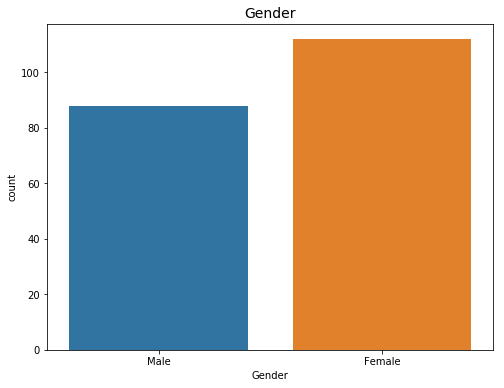

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x = 'Gender', data=df)
plt.title('Gender', fontsize = 14)
plt.show()

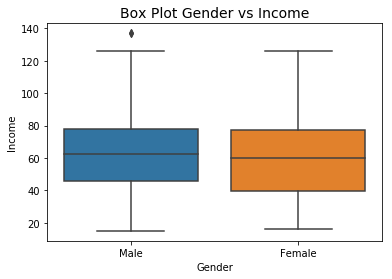

In [12]:
#relationship between "Gender" and "Income".
sns.boxplot(x="Gender", y="Income", data=df)
plt.title('Box Plot Gender vs Income', fontsize = 14)
plt.show()

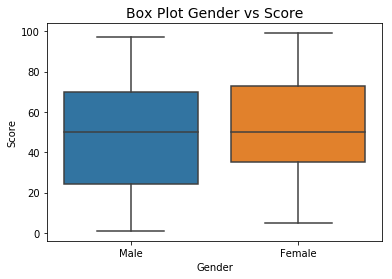

In [13]:
#relationship between "Gender" and "Score".
sns.boxplot(x="Gender", y="Score", data=df)
plt.title('Box Plot Gender vs Score', fontsize = 14)
plt.show()

### Numeric Features

In [14]:
df.describe()

CustomerID         Age      Income       Score
count  200.000000  200.000000  200.000000  200.000000
mean   100.500000   38.850000   60.560000   50.200000
std     57.879185   13.969007   26.264721   25.823522
min      1.000000   18.000000   15.000000    1.000000
25%     50.750000   28.750000   41.500000   34.750000
50%    100.500000   36.000000   61.500000   50.000000
75%    150.250000   49.000000   78.000000   73.000000
max    200.000000   70.000000  137.000000   99.000000

### Distributions Of Feature Values

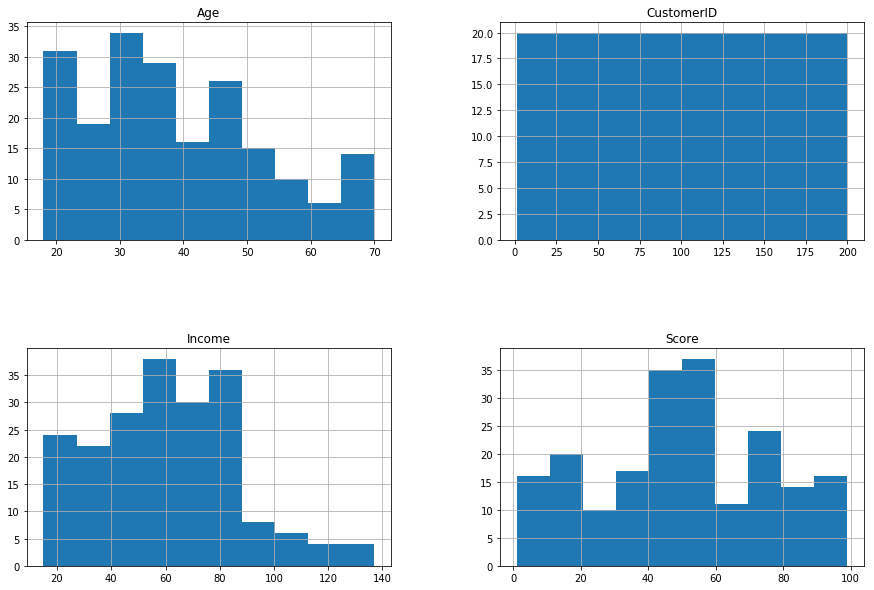

In [15]:
#Calling `hist` method to plot histograms of each of the numeric features for data bank
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)
plt.show()

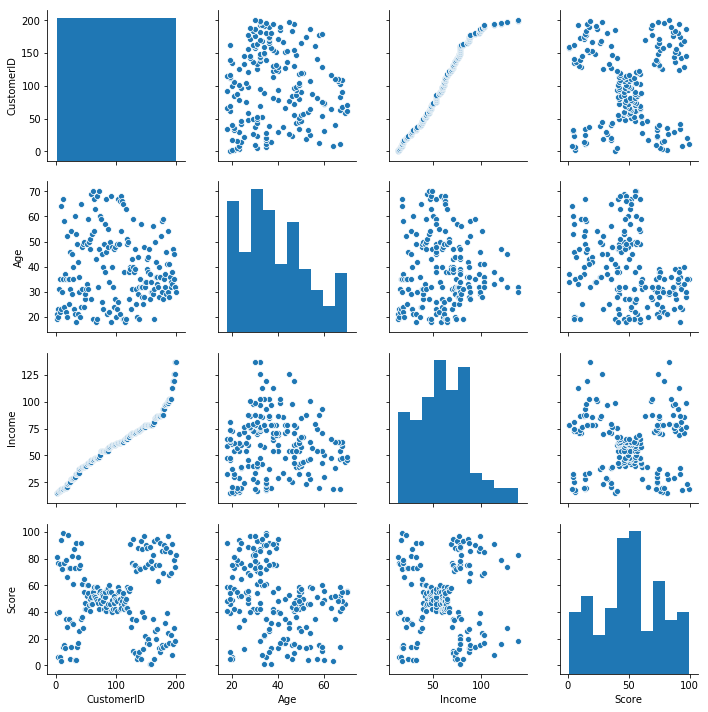

In [16]:
#pair plot
sns.pairplot(df)
plt.show()

CustomerID is Client number.For each customer holding the account,it is unique identifier for the customer and it has no impact in our customer segmentation. So we can drop the column CustomerID.

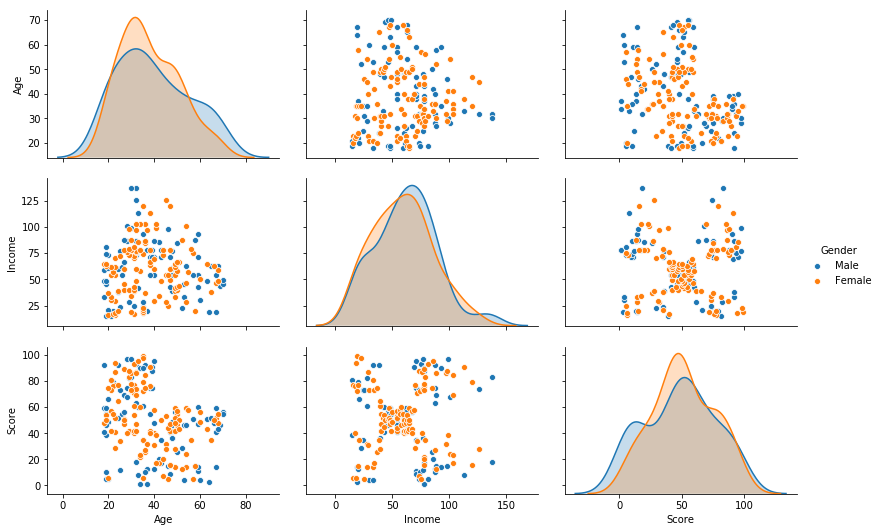

In [17]:
# Let's see our data in a detailed way with pairplot
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

From the above plot we see that gender has no direct relation to segmenting customers. That's why we can drop it and move on with other features.

Customer_ID is Client number.For each customer holding the account,it is unique identifier for the customer and it has no impact in our customer segmentation. So we can drop the column Customer_ID.

In [18]:
X = df.drop(['CustomerID', 'Gender'], axis=1)
X.head()

Age  Income  Score
0   19      15     39
1   21      15     81
2   20      16      6
3   23      16     77
4   31      17     40

### Customer Segmentation with K-Means

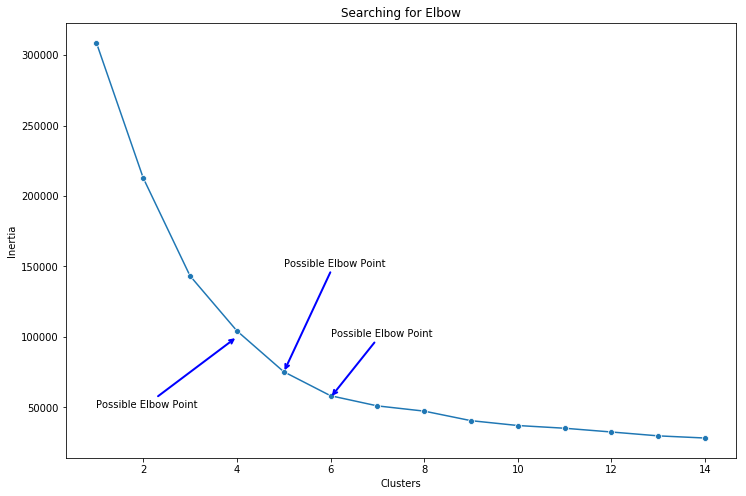

In [19]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 15):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 15)), y=clusters, marker='o', ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(4, 100000), xytext=(1, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))


ax.annotate('Possible Elbow Point', xy=(5, 75000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(6, 57000), xytext=(6, 100000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))


plt.show()

Elbow method tells us to select the cluster when there is a significant change in inertia. As we can see from the graph, we can say this may be either 4, or 5 or 6. Let's see both results in graph and decide.

###  Creating the Visual Plots

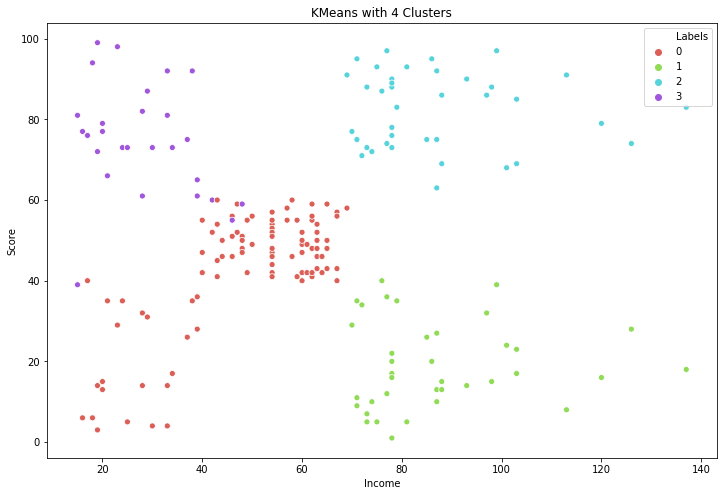

In [20]:
# 4 cluster
km4 = KMeans(n_clusters=4).fit(X)

X['Labels'] = km4.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 4))
plt.title('KMeans with 4 Clusters')
plt.show()

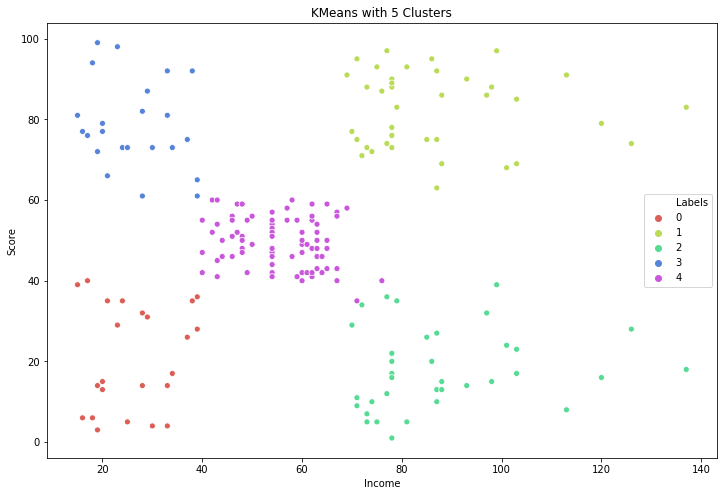

In [21]:
# Let's see with 5 Clusters
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

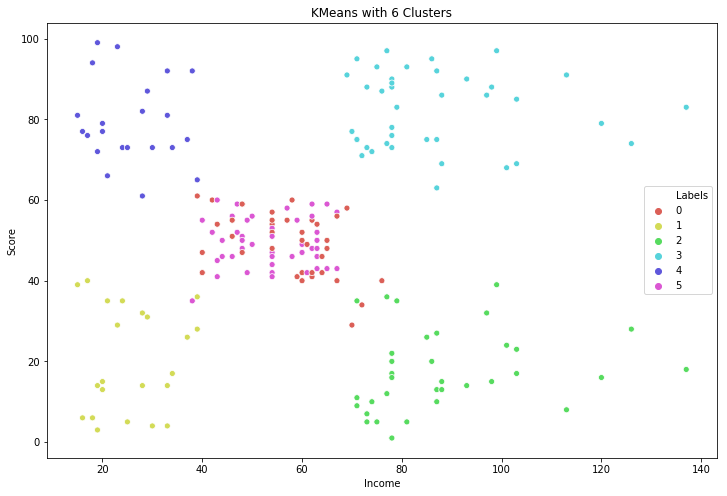

In [22]:
# Let's see with 6 Clusters
km6 = KMeans(n_clusters=6).fit(X)

X['Labels'] = km6.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 6))
plt.title('KMeans with 6 Clusters')
plt.show()


By judging from the plots we could say that 5 cluster seems better than 4 or 6. As this is a unsupervised problem we can't really know for sure which one is the best in real life but by looking at the plots it's safe to say that 5 would be our choice. 

We can analyze our 5 clusters in detail now:

- `Label 0` is low income and low spending
- `Label 1` is high income and high spending
- `Label 2` is mid income and mid spending
- `Label 3` is high income and low spending
- `Label 4` is low income and high spending


In [23]:
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet[0:4]

array([[-1.42456879, -1.73899919, -0.43480148, -0.89407226],
       [-1.28103541, -1.73899919,  1.19570407,  0.79817808],
       [-1.3528021 , -1.70082976, -1.71591298, -0.89407226],
       [-1.13750203, -1.70082976,  1.04041783,  0.79817808]])

In [24]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(init = "k-means++", n_clusters = 5)
kmeans.fit(Clus_dataSet)
pred = kmeans.predict(Clus_dataSet)
pred

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 1,
       1, 4, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [25]:
# Finally, letâ€™s look at the value count of points in each of the above-formed clusters:

frame = pd.DataFrame(Clus_dataSet)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    60
0    44
2    39
3    35
4    22
Name: cluster, dtype: int64

In [26]:
# Classififation of data with clusters
df["Clusters_km"] = kmeans.labels_
df.head(5)

CustomerID  Gender  Age  Income  Score  Clusters_km
0           1    Male   19      15     39            1
1           2    Male   21      15     81            4
2           3  Female   20      16      6            1
3           4  Female   23      16     77            4
4           5  Female   31      17     40            1

We can clearly see our clusters as we indicated above.

## Hierarchical Clustering

### Agglomerative

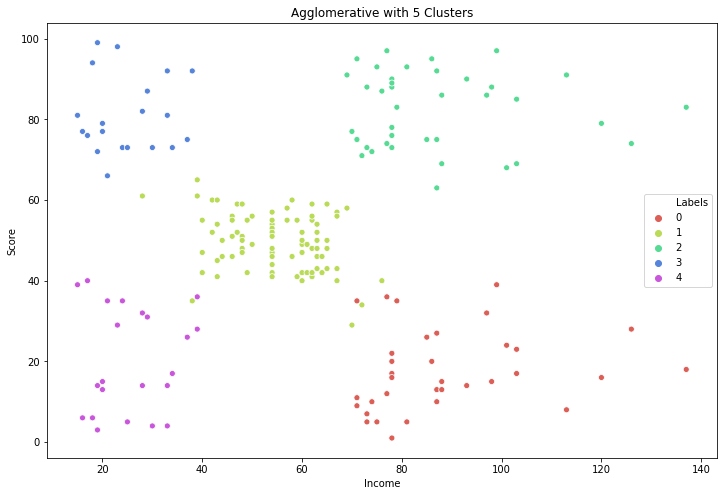

In [27]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()


### Dendrogram Associated for the Agglomerative Hierarchical Clustering
We know that a <b>distance matrix</b> contains the distance from each point to every other point of a dataset.
We can use the function <b> distance_matrix, </b> which requires two data points as inputs. Note that the distance values are symmetric, with a diagonal of 0's.

In [28]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(X, X)
print(dist)

[[  0.          42.05948169  33.03028913 ... 117.12813496 124.53915047
  130.17296186]
 [ 42.05948169   0.          75.01999733 ... 111.76761606 137.77880824
  122.35195135]
 [ 33.03028913  75.01999733   0.         ... 129.89226305 122.24974438
  143.78456106]
 ...
 [117.12813496 111.76761606 129.89226305 ...   0.          57.10516614
   14.35270009]
 [124.53915047 137.77880824 122.24974438 ...  57.10516614   0.
   65.06150936]
 [130.17296186 122.35195135 143.78456106 ...  14.35270009  65.06150936
    0.        ]]


Using the <b> linkage </b> class from hierarchy, pass in the parameters: <b> 'dist' </b> for the distance matrix  and  <b> 'complete'</b> for complete linkage.

In [29]:
Z = hierarchy.linkage(dist, 'complete')

A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. Each merge is represented by a horizontal line. By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering. 

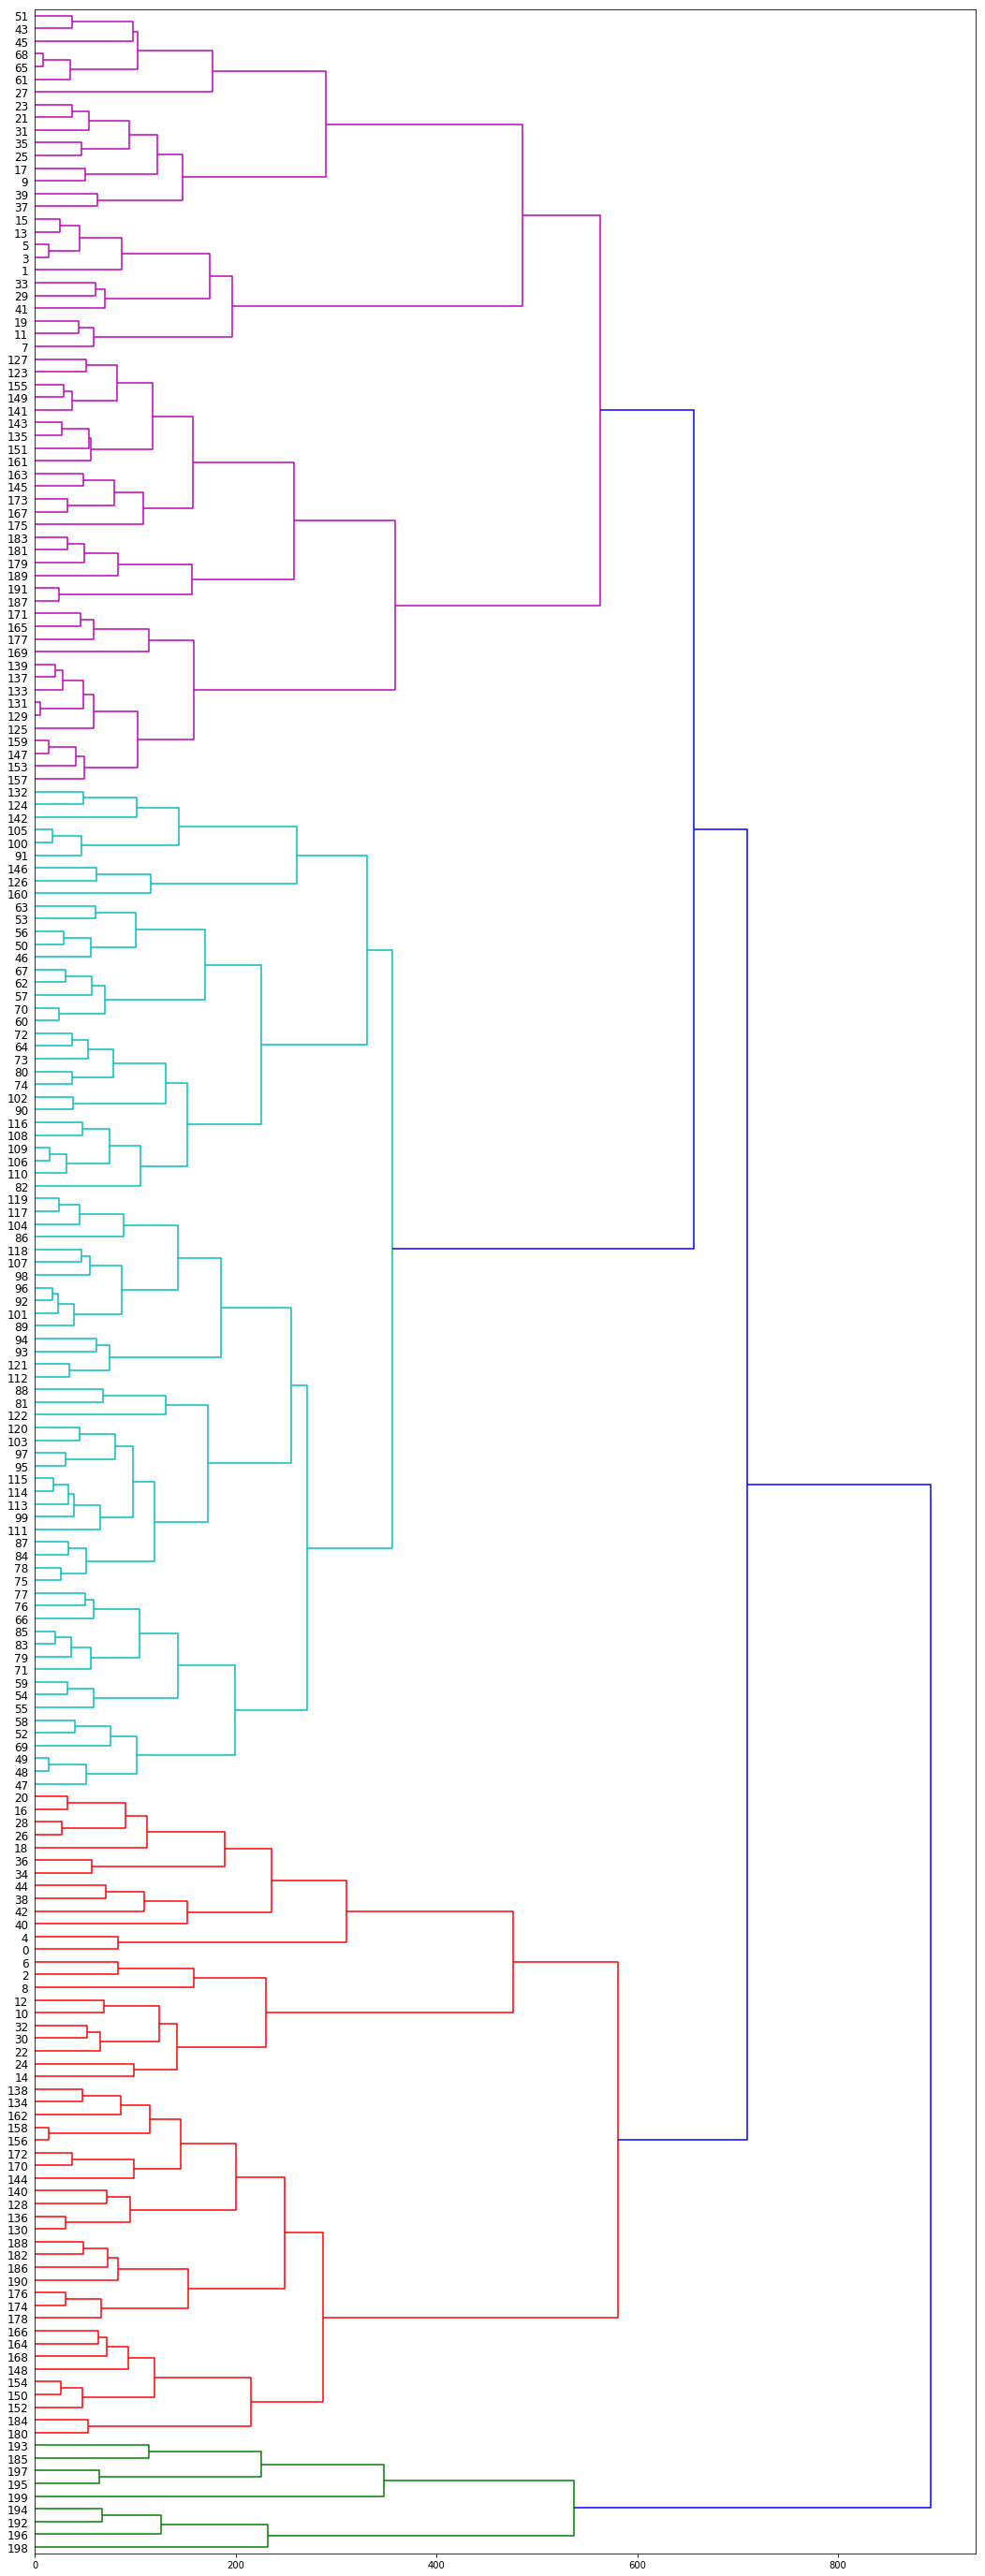

In [30]:
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

We used __complete__ linkage for our case, let's change it to __average__ linkage to see how the dendogram changes.

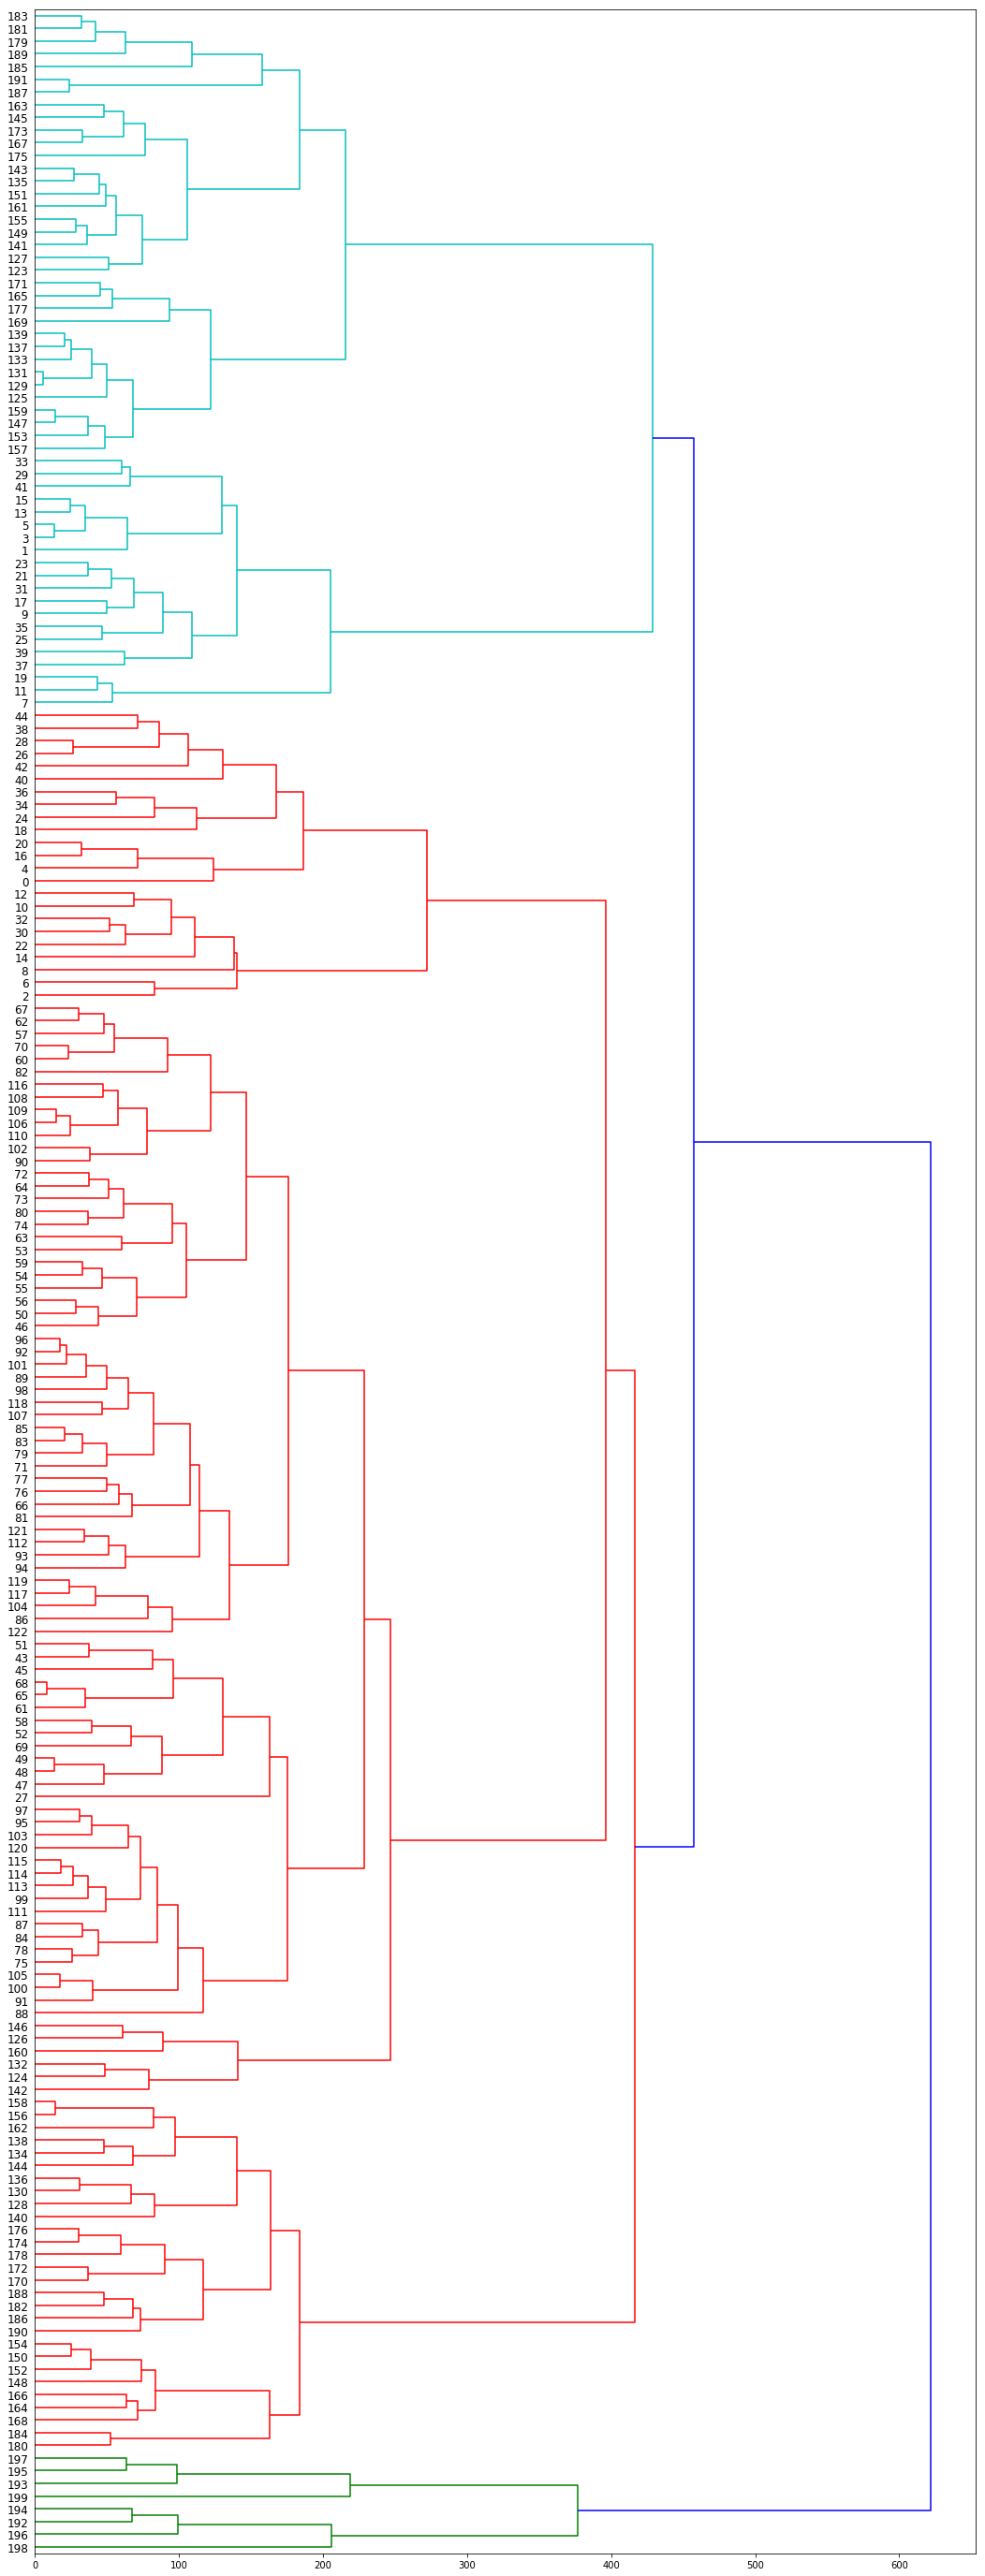

In [31]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

## Density Based Clustering (DBSCAN)

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. This technique is one of the most common clustering algorithms  which works based on density of object. The whole idea is that if a particular point belongs to a cluster, it should be near to lots of other points in that cluster.

It works based on two parameters: Epsilon and Minimum Points  
__Epsilon__ determine a specified radius that if includes enough number of points within, we call it dense area  
__minimumSamples__ determine the minimum number of data points we want in a neighborhood to define a cluster.

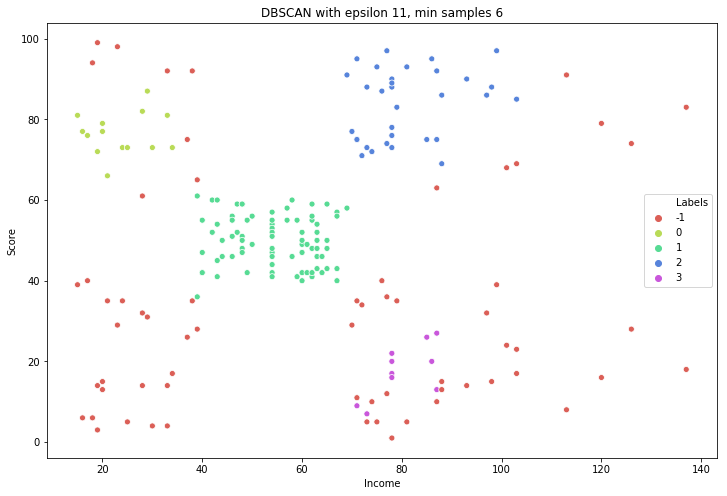

In [32]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=11, min_samples=6).fit(X)

X['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()


As we can see DBSCAN doesn't perform very well because the density in our data is not that strong. Label -1 means outliers so it will appear most as outliers. We may have performed better if we had had a bigger data.

## Mean Shift Algorithm

MeanShift clustering aims to discover blobs in a smooth density of samples. It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

The algorithm automatically sets the number of clusters, instead of relying on a parameter bandwidth, which dictates the size of the region to search through. This parameter can be set manually, but can be estimated using the provided estimate_bandwidth function, which is called if the bandwidth is not set.

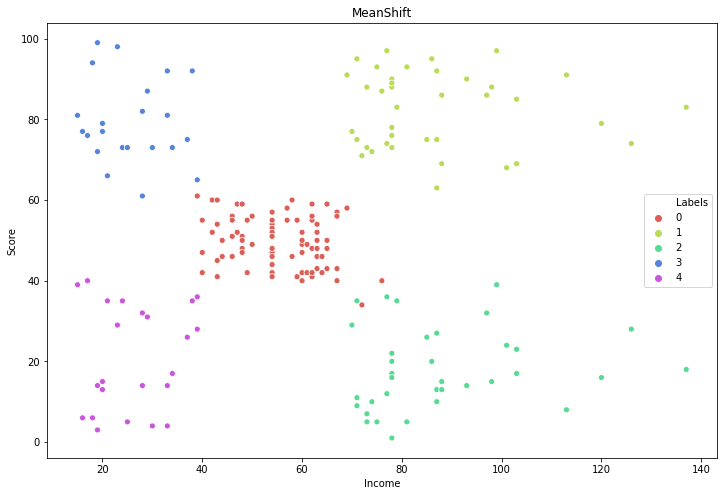

In [33]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth).fit(X)

X['Labels'] = ms.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()

## All in One Place

Let's visualize all the algorithms we used so far and see their clustering distributions.

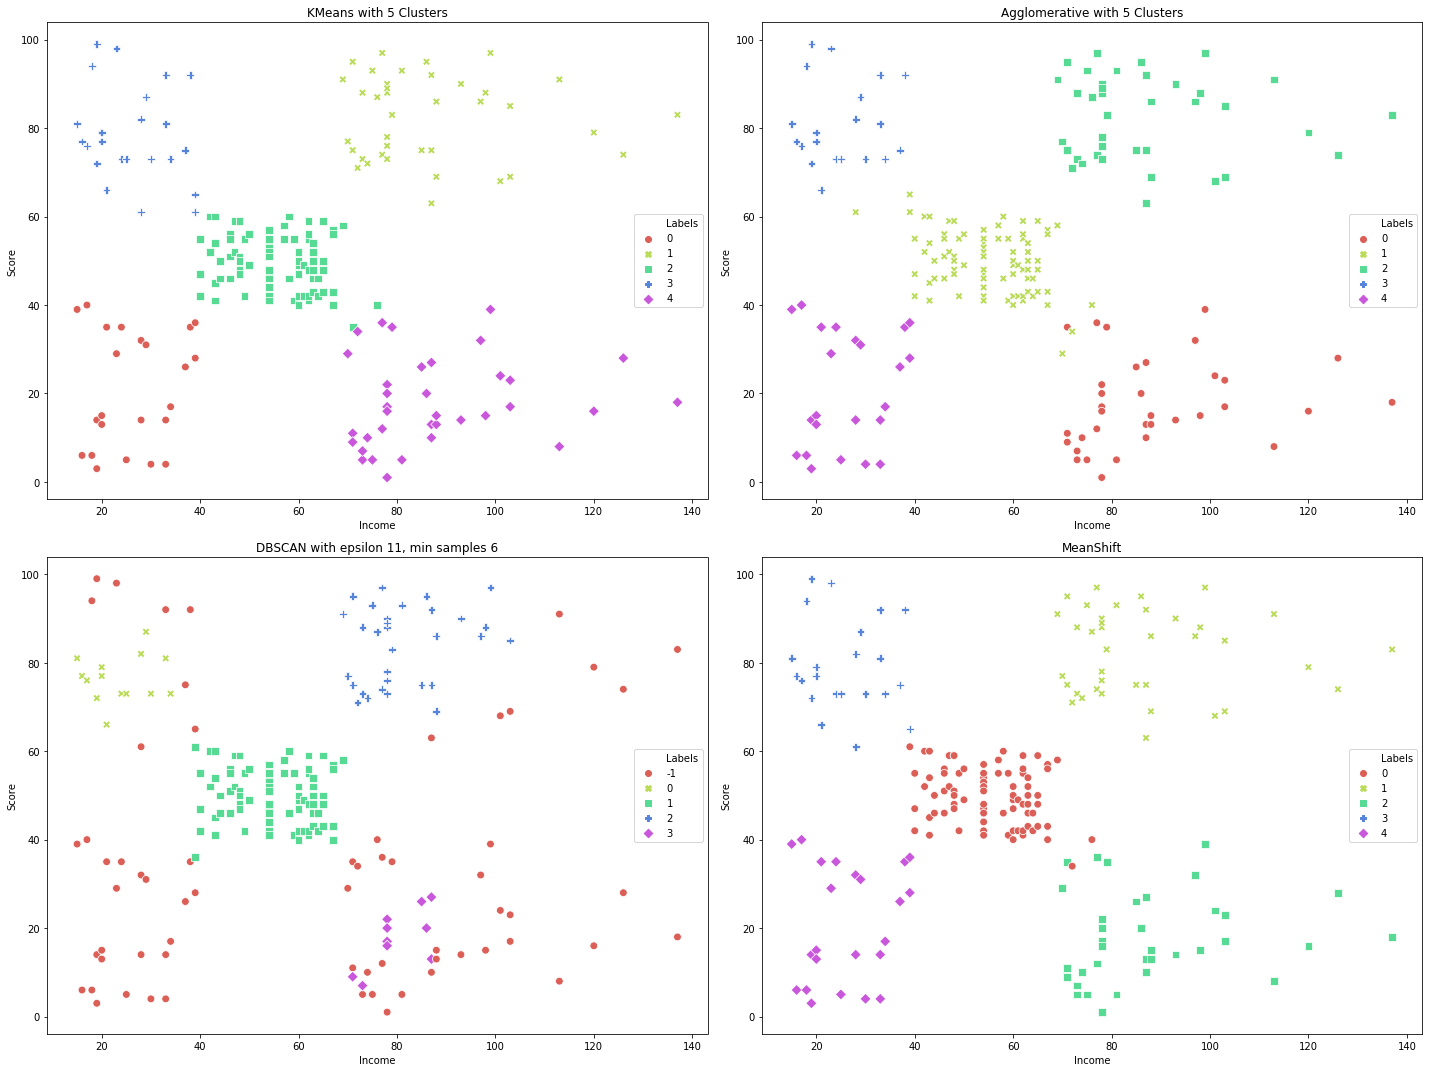

In [34]:
fig = plt.figure(figsize=(20,15))

##### KMeans #####
ax = fig.add_subplot(221)

km5 = KMeans(n_clusters=5).fit(X)
X['Labels'] = km5.labels_
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], style=X['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('KMeans with 5 Clusters')


##### Agglomerative Clustering #####
ax = fig.add_subplot(222)

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)
X['Labels'] = agglom.labels_
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], style=X['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('Agglomerative with 5 Clusters')


##### DBSCAN #####
ax = fig.add_subplot(223)

db = DBSCAN(eps=11, min_samples=6).fit(X)
X['Labels'] = db.labels_
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], style=X['Labels'], s=60,
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]), ax=ax)
ax.set_title('DBSCAN with epsilon 11, min samples 6')


##### MEAN SHIFT #####
ax = fig.add_subplot(224)

bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth).fit(X)
X['Labels'] = ms.labels_
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], style=X['Labels'], s=60,
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]), ax=ax)
ax.set_title('MeanShift')

plt.tight_layout()
plt.show()

## Conclusions

As we saw above that the KMeans is easier to apply and to predict the clusters of the Customers. There are other clustering algoriths like Spectral, Ward, Optics, Birch, Gaussian mixtures that we can use for further study.